<a href="https://colab.research.google.com/github/hwyoon217/AI/blob/main/bigdata_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

숫자 인식 인공지능

In [ ]:
from tensorflow.keras.models import Sequential         # 순차형태
from tensorflow.keras.layers import Dense, Activation  # 뉴런개수, 활성화함수
from tensorflow.keras.utils import to_categorical      # 범주화(0-9까지 구별) -> 원핫인코딩
from tensorflow.keras.datasets import mnist            # mnist 데이터셋 불러오기
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  print(x_train.shape)
  print(x_test.shape)
  print(y_train.shape)   # y 데이터는 1차원배열(튜플)
  print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


x 데이터 형태 바꾸기 (모델링 하기위해서는 1줄로 바꿔야함)

In [ ]:
X_train = x_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)
X_train = X_train.astype('float32') / 255  # 흰색 = 0, 검은색 = 255, 회색 = 1~254 
X_test = X_test.astype('float32') / 255    # 따라서 255 나누어 0~1 사이 값으로 변환
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


y 데이터 형태 바꾸기 (수치형 데이터를 0-9까지의 범주형 데이터로 변환)

In [ ]:
Y_train = to_categorical(y_train,10)
Y_test = to_categorical(y_test, 10)
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


모델 설계

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))   # 첫번째 은닉층 (입력층 => 784개)
model.add(Activation('relu'))
model.add(Dense(256))                       # 두번째 은닉층
model.add(Activation('relu'))
model.add(Dense(10))                        # 출력층
model.add(Activation('softmax'))            # 어떤 범주를 가장 높은 확률로 예측하는지 알아볼 때 사용
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trai

모델 학습

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,Y_train, batch_size=128, epochs=10, verbose=1)
# batch_size : 데이터 크기, epochs : 학습횟수(너무 크면 과적합 문제 야기), verbose : 로깅 출력

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2261 - accuracy: 0.9338
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0839 - accuracy: 0.9742
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0521 - accuracy: 0.9837
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0368 - accuracy: 0.9879
Epoch 5/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0275 - accuracy: 0.9909
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0228 - accuracy: 0.9926
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0153 - accuracy: 0.9950
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0168 - accuracy: 0.9943
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0117 - accura

모델 정확도

In [ ]:
score = model.evaluate(X_test,Y_test)
print('Test Score : ', score[0])   # 오차값(0에 가까울수록 오차가 적은것)
print('Test Accuracy : ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0641 - accuracy: 0.9835
Test Score :  0.06408929079771042
Test Accuracy :  0.9835000038146973


모델 학습 결과

In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

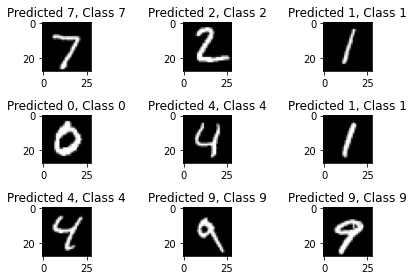

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  correct = correct_indices[i]
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
  plt.title ('Predicted {}, Class {}'.format(predicted_classes[correct],y_test[correct]))
plt.tight_layout()

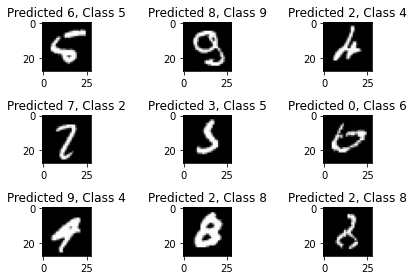

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
  plt.title ('Predicted {}, Class {}'.format(predicted_classes[incorrect],y_test[incorrect]))
plt.tight_layout()